In [3]:
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() 

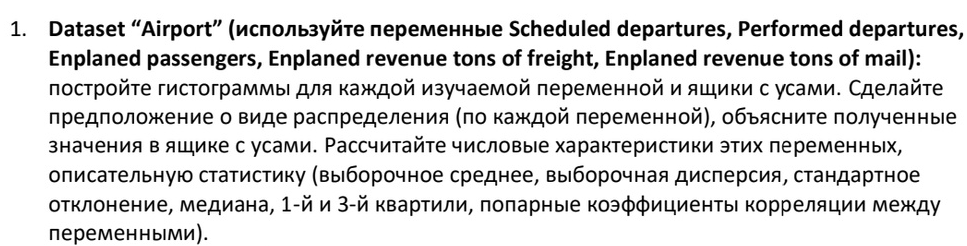

### Задание 1
#### Dataset "Airport"

In [4]:
cols = ['Airport', 'City', 'Scheduled departures', 'Performed departures', 'Enplaned passengers', 'Enplaned revenue tons of freight', 'Enplaned revenue tons of mail']
df = pd.read_fwf('datasets/airportdat.txt', header=None, widths=[21, 22, 6, 7, 9, 10, 10], names=cols)

df.head()

,Airport,City,Scheduled departures,Performed departures,Enplaned passengers,Enplaned revenue tons of freight,Enplaned revenue tons of mail
0,HARTSFIELD INTL,ATLANTA,285693,288803,22665665,165668.76,93039.48
1,BALTO/WASH INTL,BALTIMORE,73300,74048,4420425,18041.52,19722.93
2,LOGAN INTL,BOSTON,114153,115524,9549585,127815.09,29785.72
3,DOUGLAS MUNI,CHARLOTTE,120210,121798,7076954,36242.84,15399.46
4,OHARE INTL,CHICAGO,322430,332338,25636383,300463.80,140359.38


In [5]:
df.describe()

,Scheduled departures,Performed departures,Enplaned passengers,Enplaned revenue tons of freight,Enplaned revenue tons of mail
count,134.000000,134.000000,1.340000e+02,134.000000,134.000000
mean,45562.425373,46304.962687,3.136192e+06,33858.157687,11461.872537
std,56594.531485,57715.756690,4.604642e+06,81091.952306,20578.909088
min,1188.000000,1253.000000,0.000000e+00,7.950000,0.000000
25%,9049.000000,9195.000000,4.242468e+05,1540.135000,876.882500
50%,22864.500000,23027.500000,1.210722e+06,6195.270000,2919.535000
75%,63643.750000,64196.750000,3.865530e+06,20558.922500,11968.017500
max,322430.000000,332338.000000,2.563638e+07,614223.600000,140359.380000


Выборочная дисперсия

In [6]:
print('Scheduled departures: ', statistics.variance(df['Scheduled departures']))
print('Performed departures: ', statistics.variance(df['Performed departures']))
print('Enplaned passengers: ', statistics.variance(df['Enplaned passengers']))
print('Enplaned revenue tons of freight: ', statistics.variance(df['Enplaned revenue tons of freight']))
print('Enplaned revenue tons of mail: ', statistics.variance(df['Enplaned revenue tons of mail']))

Scheduled departures:  3202940994.005667
Performed departures:  3331108570.306868
Enplaned passengers:  21202724262073.754
Enplaned revenue tons of freight:  6575904728.799899
Enplaned revenue tons of mail:  423491499.246968


mean - выборочное среднее

![Alt text](imgs/image-1.png)

выборочная дисперсия - на сколько значения в выборке отклоняются от среднего

![Alt text](imgs/image-2.png)

std - cтандартное отклонение наблюдений

![Alt text](imgs/image-3.png) 

![Alt text](imgs/image-4.png) — среднее арифметическое выборки 

50% - медиана

25% - 1 квартиль

75% - 3 квартиль

порядковый номер медианы = (n+1)/2; порядковый номер квартиля = номер квартиля*(n+1)/4

#### Попарные коэффициенты корреляции

<Axes: >

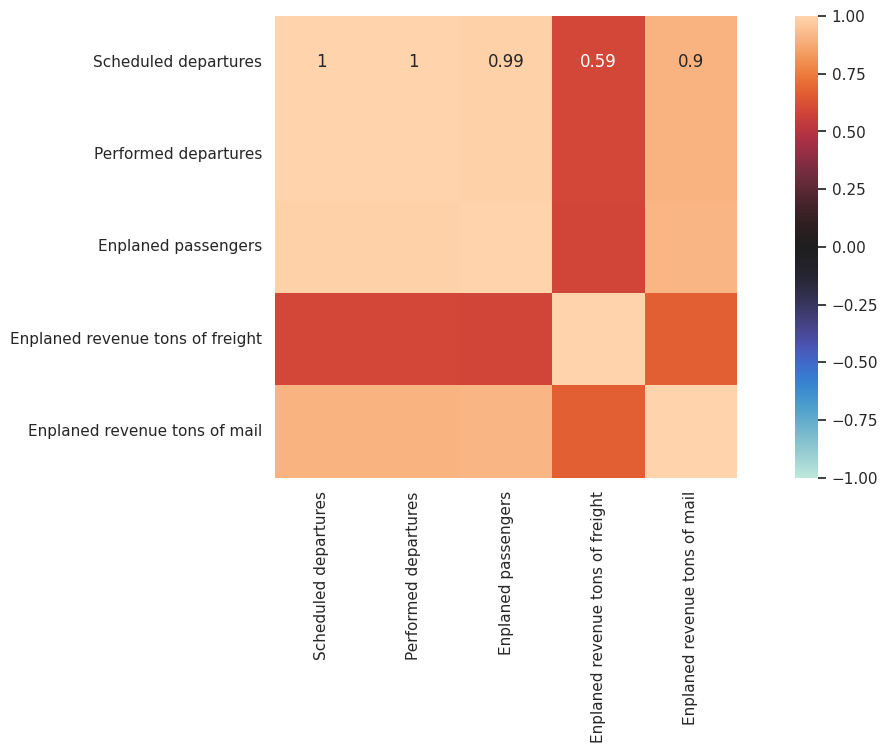

In [7]:
df = df.drop(columns=['Airport', 'City'])
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), 
            vmin=-1.0,
            vmax=1.0, 
            cmap="icefire",
            square=True,
            annot=True)

In [8]:
df.corr()

,Scheduled departures,Performed departures,Enplaned passengers,Enplaned revenue tons of freight,Enplaned revenue tons of mail
Scheduled departures,1.000000,0.999690,0.985058,0.593228,0.898682
Performed departures,0.999690,1.000000,0.984522,0.593499,0.899414
Enplaned passengers,0.985058,0.984522,1.000000,0.581516,0.912898
Enplaned revenue tons of freight,0.593228,0.593499,0.581516,1.000000,0.667230
Enplaned revenue tons of mail,0.898682,0.899414,0.912898,0.667230,1.000000


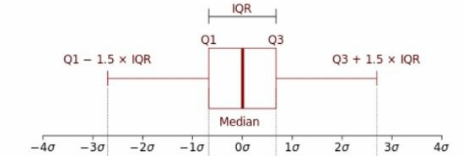

#### Scheduled departures

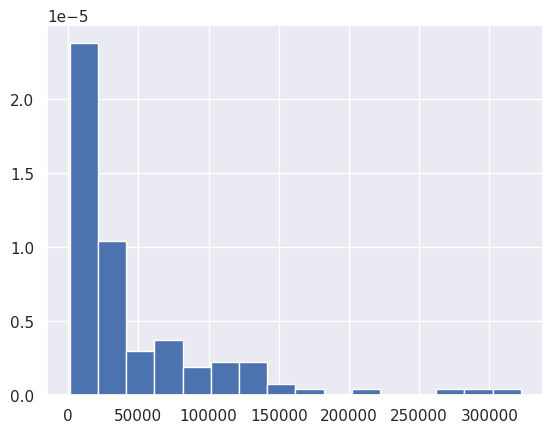

In [9]:
col = 'Scheduled departures'
plt.hist(x=df[col], bins='auto', density=True);

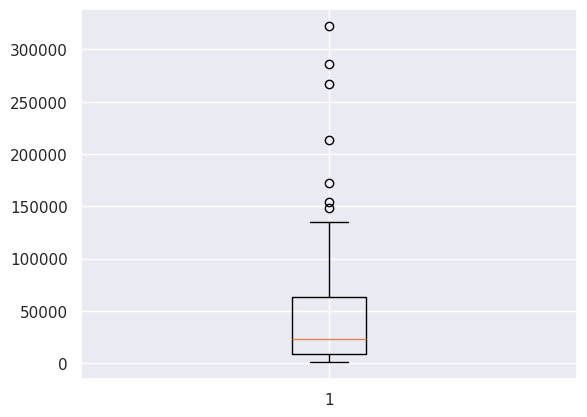

In [10]:
plt.boxplot(x=df[col]);

Линиями (усы) обозначается степень разброса (дисперсии) за пределами верхнего и нижнего квартилей. - мин/макс точки данных выборки

Точки - выбросы (единичные данные)

Оранжевая линия - медиана (2-й квартиль или 50-процентиль) 

Грани прямоугольника - 1-й квартиль или 25-й процентиль — представляется левой стороной «ящика»; 3-й квартиль или 75-й процентиль — представляется правой стороной «ящика»;

Их разности - межквартильный размах

Вывод: распределение выборки ассиметричное

#### Performed departures

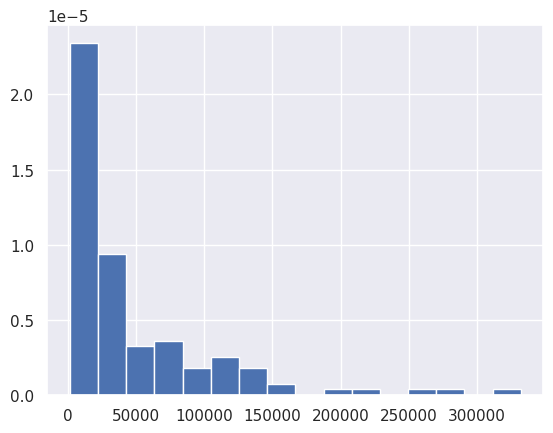

In [11]:
col = 'Performed departures'
plt.hist(x=df[col], bins='auto', density=True);

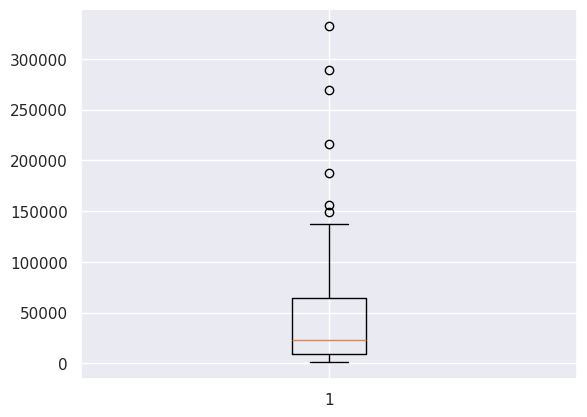

In [12]:
plt.boxplot(x=df[col]);

#### Enplaned passengers

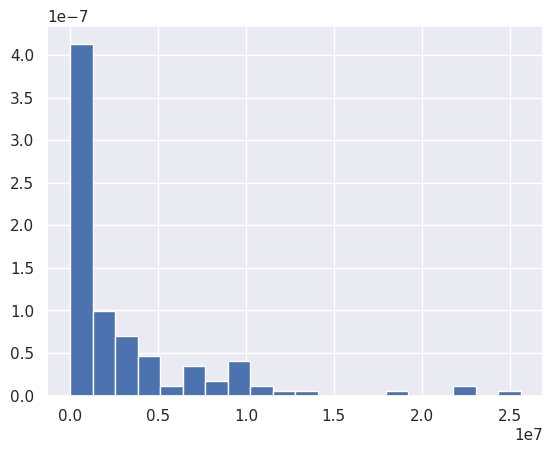

In [13]:
col = 'Enplaned passengers'
plt.hist(x=df[col], bins='auto', density=True);

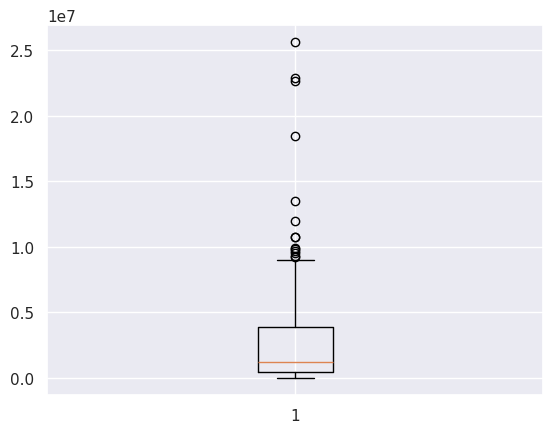

In [14]:
plt.boxplot(x=df[col]);

#### Enplaned revenue tons of freight

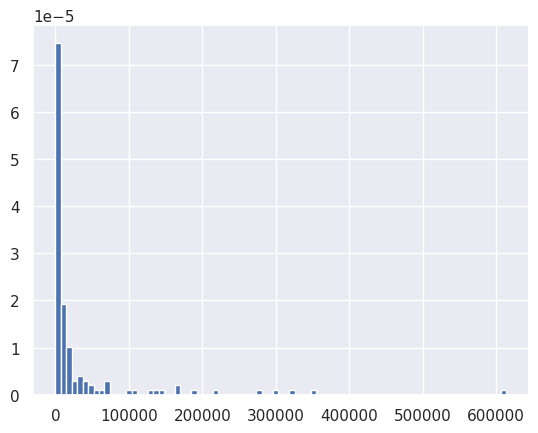

In [15]:
col = 'Enplaned revenue tons of freight'
plt.hist(x=df[col], bins='auto', density=True);

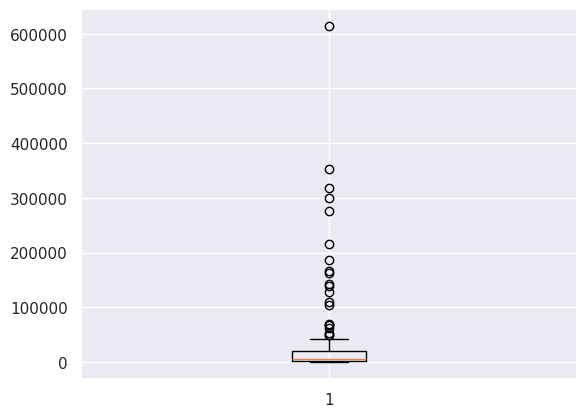

In [16]:
plt.boxplot(x=df[col]);

#### Enplaned revenue tons of mail

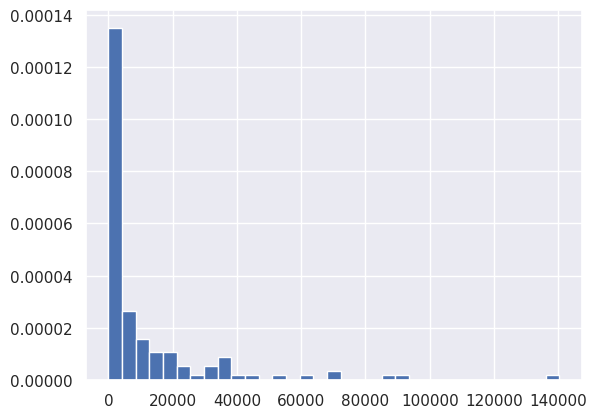

In [17]:
col = 'Enplaned revenue tons of mail'
plt.hist(x=df[col], bins='auto', density=True);

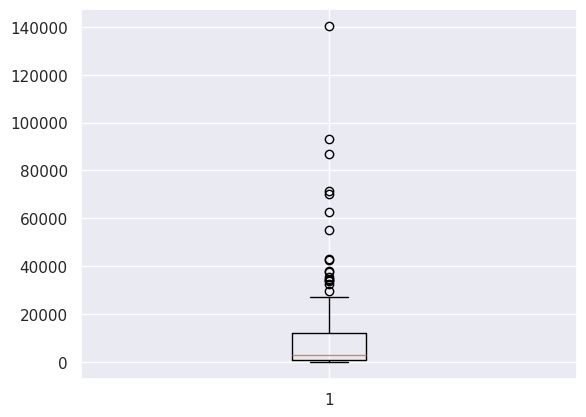

In [18]:
plt.boxplot(x=df[col]);